# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
cities.index



<function list.index(value, start=0, stop=9223372036854775807, /)>

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

temps = []
wind_speeds = []
humidity_per = []
cloudiness = []
lats = []
lons = []
cities2 = []
for city in cities:
    try:
        response = requests.get(base_url + city + "&appid=" + api_key + "&units=imperial")
        
        data = response.json()
        
    
        temp = data['main']['temp']
        clouds = data['clouds']['all']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temps.append(temp)
        cloudiness.append(clouds)
        humidity_per.append(humidity)
        wind_speeds.append(wind_speed)
        lats.append(lat)
        lons.append(lon)
        cities2.append(city)
        print(f"Adding data for {city}. City number {len(lons)}.")

    except KeyError: 
        print("City not found.")
    

Adding data for port shepstone. City number 1.
Adding data for surab. City number 2.
Adding data for hithadhoo. City number 3.
City not found.
Adding data for punta arenas. City number 4.
Adding data for okhotsk. City number 5.
Adding data for lebu. City number 6.
Adding data for anshun. City number 7.
Adding data for sinnamary. City number 8.
Adding data for rikitea. City number 9.
Adding data for ranong. City number 10.
City not found.
Adding data for saldanha. City number 11.
Adding data for channel-port aux basques. City number 12.
Adding data for mahebourg. City number 13.
Adding data for bluff. City number 14.
Adding data for avarua. City number 15.
Adding data for mataura. City number 16.
City not found.
Adding data for qaanaaq. City number 17.
Adding data for carnarvon. City number 18.
Adding data for zapolyarnyy. City number 19.
City not found.
City not found.
Adding data for ostrovnoy. City number 20.
Adding data for nikolskoye. City number 21.
Adding data for tuktoyaktuk. Ci

Adding data for yumaguzino. City number 182.
Adding data for faya. City number 183.
Adding data for umm lajj. City number 184.
Adding data for krasnyy chikoy. City number 185.
Adding data for pemberton. City number 186.
Adding data for yellowknife. City number 187.
Adding data for sangolqui. City number 188.
Adding data for mehamn. City number 189.
Adding data for lerwick. City number 190.
Adding data for sao joao da barra. City number 191.
Adding data for nguru. City number 192.
Adding data for awbari. City number 193.
City not found.
Adding data for kavaratti. City number 194.
City not found.
Adding data for mairang. City number 195.
Adding data for aksu. City number 196.
Adding data for mitsamiouli. City number 197.
Adding data for yudong. City number 198.
Adding data for magadan. City number 199.
Adding data for leshukonskoye. City number 200.
Adding data for coquimbo. City number 201.
Adding data for ribeira grande. City number 202.
Adding data for mpika. City number 203.
Adding d

Adding data for inuvik. City number 368.
Adding data for saint-paul. City number 369.
Adding data for agadez. City number 370.
Adding data for bossangoa. City number 371.
Adding data for north bend. City number 372.
Adding data for yerbogachen. City number 373.
Adding data for ahipara. City number 374.
Adding data for kampot. City number 375.
Adding data for comodoro rivadavia. City number 376.
Adding data for la ronge. City number 377.
Adding data for grand-santi. City number 378.
Adding data for nelson bay. City number 379.
Adding data for yagodnoye. City number 380.
Adding data for napa. City number 381.
City not found.
Adding data for ishigaki. City number 382.
Adding data for shasta lake. City number 383.
Adding data for muros. City number 384.
Adding data for kununurra. City number 385.
Adding data for sidi ali. City number 386.
Adding data for abu samrah. City number 387.
City not found.
City not found.
Adding data for tigil. City number 388.
Adding data for uvat. City number 38

City not found.
Adding data for acapulco. City number 550.
Adding data for oriximina. City number 551.
Adding data for jiangyou. City number 552.
Adding data for hoshcha. City number 553.
Adding data for xinzhi. City number 554.
Adding data for quetame. City number 555.


In [5]:
len(cities2)

555

In [6]:
city_data = pd.DataFrame({'City': cities2,
                          'Latitude': lats,
                          'Longitude': lons,
                          'Temperature': temps,
                          'Cloud Cover': cloudiness,
                          'Humidity': humidity_per,
                          'Wind Speed': wind_speeds})
city_data.head()




,City,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed
0,port shepstone,-30.74,30.45,69.29,0,90,6.96
1,surab,28.49,66.26,28.74,0,59,2.26
2,hithadhoo,-0.60,73.08,78.56,88,100,4.61
3,punta arenas,-53.16,-70.91,50.00,75,46,31.09
4,okhotsk,59.36,143.24,-18.69,44,100,9.08


In [7]:
city_data.to_csv("city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

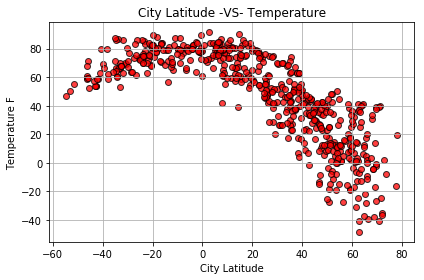

In [12]:
plt.scatter(lats, temps, marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Temperature')
plt.xlabel('City Latitude')
plt.ylabel('Temperature F')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Temperature.png")

#### Latitude vs. Humidity Plot

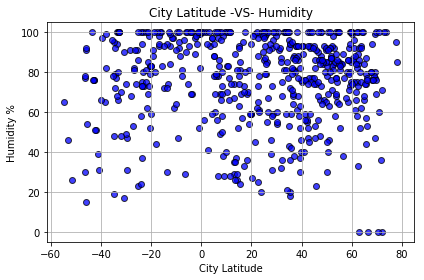

In [13]:
plt.scatter(lats, humidity_per, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Humidity.png")

#### Latitude vs. Cloudiness Plot

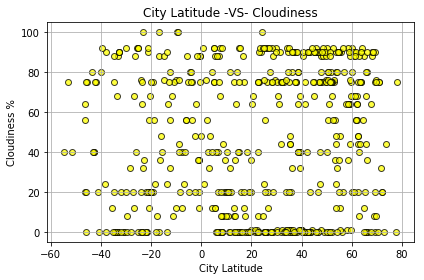

In [14]:
plt.scatter(lats, cloudiness, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Cloudiness.png")

#### Latitude vs. Wind Speed Plot

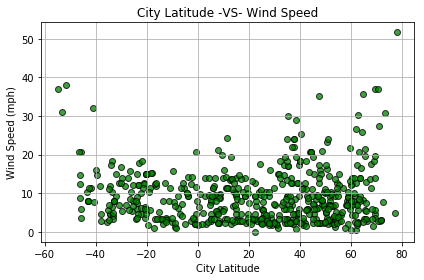

In [16]:
plt.scatter(lats, wind_speeds, marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title('City Latitude -VS- Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid() 
plt.tight_layout()
plt.savefig("City Latitude -VS- Wind Speed.png")